In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
housing=pd.read_csv('./datasets/housing.csv')
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

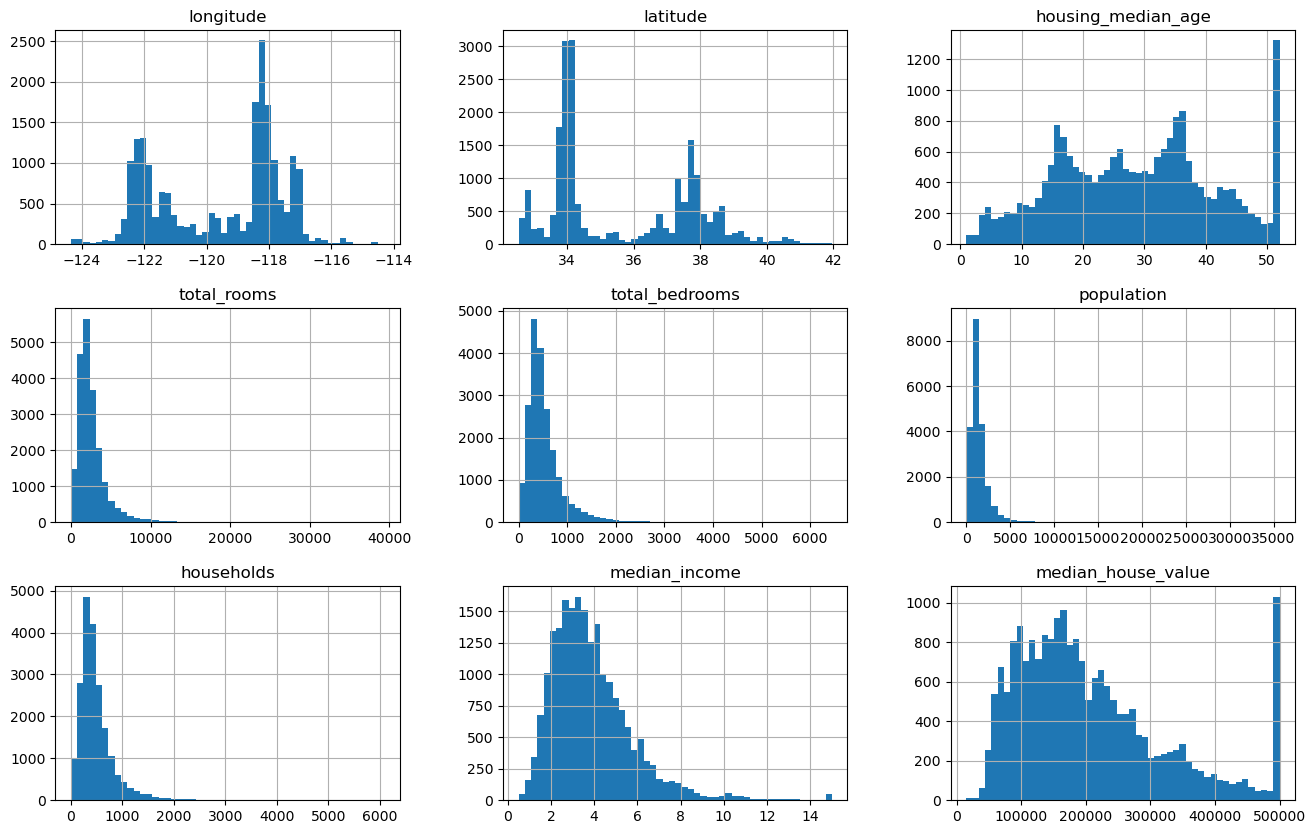

In [53]:
housing.hist(bins=50,figsize=(16,10))
plt.show()

In [54]:
def shuffle_and_split(data,test_ratio):
    #shuffling indices from 0 to len(data)-1
    #seed is provided to generate same test and train set with every run
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]



In [55]:
X_train, x_test=shuffle_and_split(housing,0.2)
print(len(X_train))
len(x_test)

16512


4128

In [56]:
from zlib import crc32

In [57]:
def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2*32

def split_data_with_id_hash(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set] , data.loc[in_test_set]

In [58]:
housing_with_id=housing.reset_index()  #adds an index column
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"index")

In [59]:
housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"]
train_set, test_set=split_data_with_id_hash(housing_with_id,0.2,"id")

In [60]:
 from sklearn.model_selection import train_test_split

In [61]:
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [62]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3       

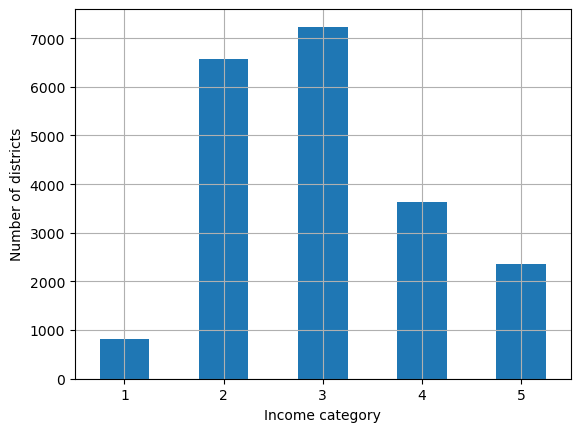

In [63]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

In [65]:
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index, test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n=housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [66]:
strat_train_set, strat_test_set=strat_splits[0]

In [67]:
strat_train_set, strat_test_set=train_test_split(housing,test_size=0.2, stratify=housing["income_cat"],random_state=42)

In [68]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [69]:
#As income_cat was defined only for stratified sampling, we can drop it because we won't use  it.
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [70]:
housing=strat_train_set.copy()

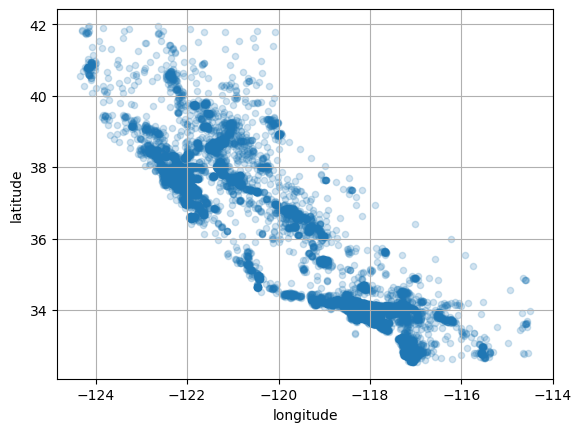

In [72]:
#Explore and visualise data to gain important insight
#Visualizing geographical data
housing.plot(kind="scatter" ,x="longitude" , y="latitude" ,grid=True , alpha=0.2)
plt.show()

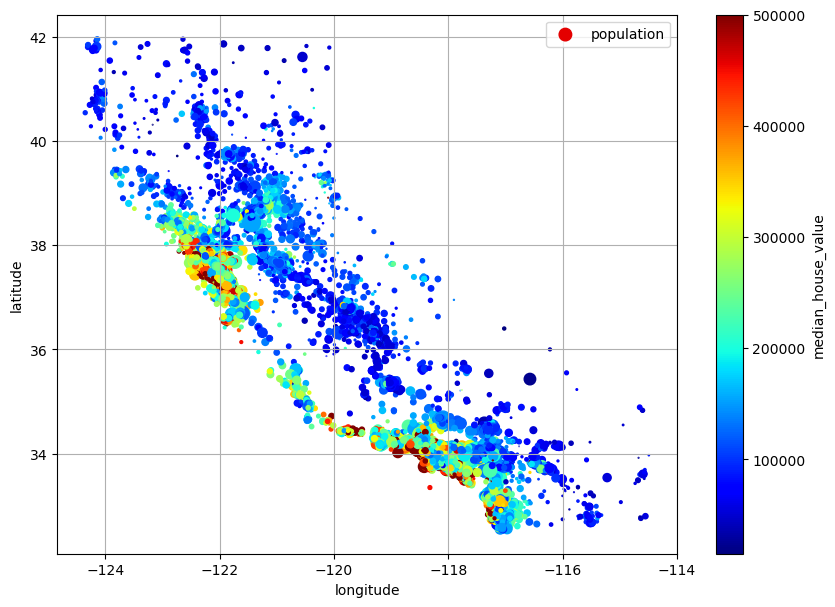

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="population",
              cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7),c="median_house_value")
plt.show()

In [79]:
corr_matrix=housing.corr()
print(corr_matrix)
corr_matrix["median_house_value"].sort_values(ascending=False)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924213           -0.102937     0.044558   
latitude            -0.924213  1.000000            0.005692    -0.036753   
housing_median_age  -0.102937  0.005692            1.000000    -0.361710   
total_rooms          0.044558 -0.036753           -0.361710     1.000000   
total_bedrooms       0.068210 -0.066391           -0.317978     0.930076   
population           0.104236 -0.115677           -0.301906     0.863967   
households           0.054261 -0.071604           -0.300075     0.916143   
median_income       -0.016542 -0.078137           -0.127043     0.197720   
median_house_value  -0.050859 -0.139584            0.102175     0.137455   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068210    0.104236    0.054261      -0.016542   
latitude                 -0.066391   -0.115677   -0.071604      -0.078137   
housing_

/var/folders/r8/12c5lk110vsf3gcpj28tgg280000gn/T/ipykernel_57966/1935528946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64